<a href="https://colab.research.google.com/github/kigit2017/ClassificationAlgoc-KNN-Bayes/blob/main/Multinomial.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Import libraries

In [12]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline


Read data file from the folder path to the dataframe

In [13]:
data = pd.read_csv("/content/iris.csv")

Split arrays or matrices into random train and test subsets.



In [14]:
from sklearn.model_selection import train_test_split
(train,test) = train_test_split(data,test_size=.20,random_state=1)

In [15]:
train_x = train.drop(['species'],axis=1)
train_y = train['species']
test_x = test.drop(['species'],axis=1)
test_y = test['species']

**Naive Bayes classifier for Multinomial models.Used in classification for discreet integer feature counts values.**

In [16]:
from sklearn.naive_bayes import MultinomialNB
muclassifier= MultinomialNB()
muclassifier.fit(test_x,test_y)


MultinomialNB()

In [17]:
y_pred = muclassifier.predict(test_x)
y_pred

array(['setosa', 'versicolor', 'versicolor', 'setosa', 'versicolor',
       'versicolor', 'versicolor', 'setosa', 'setosa', 'versicolor',
       'versicolor', 'setosa', 'versicolor', 'versicolor', 'versicolor',
       'setosa', 'versicolor', 'versicolor', 'setosa', 'setosa',
       'versicolor', 'versicolor', 'versicolor', 'setosa', 'versicolor',
       'versicolor', 'setosa', 'setosa', 'versicolor', 'versicolor'],
      dtype='<U10')

In [18]:
test = test.reset_index(drop = True)
test['pred_species'] = y_pred
test.head()

,sepal_length,sepal_width,petal_length,petal_width,species,pred_species
0,5.8,4.0,1.2,0.2,setosa,setosa
1,5.1,2.5,3.0,1.1,versicolor,versicolor
2,6.6,3.0,4.4,1.4,versicolor,versicolor
3,5.4,3.9,1.3,0.4,setosa,setosa
4,7.9,3.8,6.4,2.0,virginica,versicolor


Confusion Matrix to find test accuracy of model

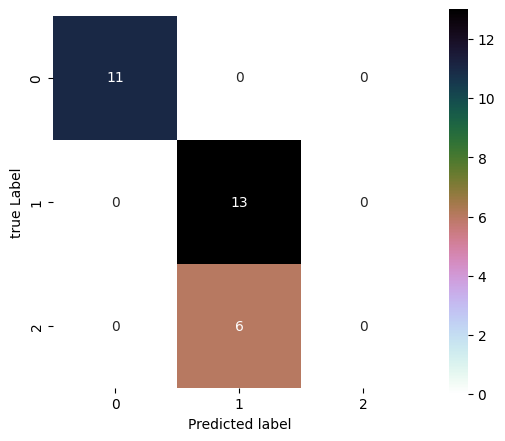

In [19]:
# Confudion matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(test_y,y_pred)
plt.figure(figsize = (6,5))
sns.heatmap(cm,annot = True,cmap= 'cubehelix_r', square = True)
plt.ylabel('true Label')
plt.xlabel('Predicted label')
plt.show()

In [20]:
## Findin accuracy from confusion matrix

a = cm.shape
a
corrpred = 0
falsepred = 0
for row in range(a[0]):
  for c in range(a[1]):
    if row ==c:
      corrpred += cm[row,c]
    else:
      falsepred += cm[row,c]

print("*"*70)
print('Correct predictions:', corrpred)
print('False Predictions', falsepred)
print("*"*70)

acc = corrpred/cm.sum()

print(round(acc*100,2))

**********************************************************************
Correct predictions: 24
False Predictions 6
**********************************************************************
80.0


In [21]:
# predicted probabiliy
muclassifier.predict_proba(test_x)[:10]

array([[0.84390635, 0.1243643 , 0.03172935],
       [0.16134402, 0.59483114, 0.24382484],
       [0.07734346, 0.65153827, 0.27111827],
       [0.77997171, 0.17267511, 0.04735318],
       [0.01864802, 0.67667553, 0.30467645],
       [0.05670833, 0.65975007, 0.2835416 ],
       [0.02004567, 0.65178012, 0.32817421],
       [0.6672503 , 0.25799054, 0.07475916],
       [0.67386086, 0.25112294, 0.07501619],
       [0.01348554, 0.65174273, 0.33477172]])

Multinomial distribution was tested with 80  percent test accuracy.